# MACHINE LEARNING ASSIGNMENT 2
## NAME : PRADYUMN SHARMA
## SUBMITTED TO : PROF. SANDEEP MONDAL
### ROLL NO: 23MT0263


With the attached dataset perform the following classification algorithms in Python.
1. Logistic Regression
2. kNN
3. Decision Tree
4. Naive Bayes
5. Support Vector Machine
Split the dataset into Training and Test data to check for the performance, like accuracy, confusion matrix, AUC,
etc. and finally write a report comparing the results obtained from the above techniques.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_excel(r"C:\Users\Pradyumn Sharma\Desktop\MACHINE LEARNING ASSIGNMENT\ASSIGNMENT 1\assi1dia\diabetes_dataset.xlsx")

In [3]:
df.head(5)

Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0      148             72             35        0  33.6   
1       85             66             29        0  26.6   
2      183             64              0        0  23.3   
3       89             66             23       94  28.1   
4      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# Data Exploration

In [4]:
df.shape #the size of data-set(rows,column)

(768, 8)

In [5]:
df.describe() #this functionGenerates descriptive statistics summary (mean, median, standard deviation, etc.) for numerical columns.

Glucose  BloodPressure  SkinThickness     Insulin         BMI  \
count  768.000000     768.000000     768.000000  768.000000  768.000000   
mean   120.894531      69.105469      20.536458   79.799479   31.992578   
std     31.972618      19.355807      15.952218  115.244002    7.884160   
min      0.000000       0.000000       0.000000    0.000000    0.000000   
25%     99.000000      62.000000       0.000000    0.000000   27.300000   
50%    117.000000      72.000000      23.000000   30.500000   32.000000   
75%    140.250000      80.000000      32.000000  127.250000   36.600000   
max    199.000000     122.000000      99.000000  846.000000   67.100000   

       DiabetesPedigreeFunction         Age     Outcome  
count                768.000000  768.000000  768.000000  
mean                   0.471876   33.240885    0.348958  
std                    0.331329   11.760232    0.476951  
min                    0.078000   21.000000    0.000000  
25%                    0.243750   24.000000    0.000000  
50%                    0.372500   29.000000    0.000000  
75%                    0.626250   41.000000    1.000000  
max                    2.420000   81.000000    1.000000

In [6]:
df.info()  # It Provides a summary of the DataFrame including data types and non-null counts.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


## Target variable property

In [7]:
df.iloc[:,7].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

 Here there are only two types of entry in our data-set so these are binary variables, It means it is a Binary Classification Technique.
it is an unbalanced data set. So, for final classification purpose, we will use 
weighted voting, where weight will be equal to inverse of no. of data in that 
perticular class.

# Corelation Among Features

In [8]:
df.corr()  # correlation amont the data frames

Glucose  BloodPressure  SkinThickness   Insulin  \
Glucose                   1.000000       0.152590       0.057328  0.331357   
BloodPressure             0.152590       1.000000       0.207371  0.088933   
SkinThickness             0.057328       0.207371       1.000000  0.436783   
Insulin                   0.331357       0.088933       0.436783  1.000000   
BMI                       0.221071       0.281805       0.392573  0.197859   
DiabetesPedigreeFunction  0.137337       0.041265       0.183928  0.185071   
Age                       0.263514       0.239528      -0.113970 -0.042163   
Outcome                   0.466581       0.065068       0.074752  0.130548   

                               BMI  DiabetesPedigreeFunction       Age  \
Glucose                   0.221071                  0.137337  0.263514   
BloodPressure             0.281805                  0.041265  0.239528   
SkinThickness             0.392573                  0.183928 -0.113970   
Insulin                   0.197859                  0.185071 -0.042163   
BMI                       1.000000                  0.140647  0.036242   
DiabetesPedigreeFunction  0.140647                  1.000000  0.033561   
Age                       0.036242                  0.033561  1.000000   
Outcome                   0.292695                  0.173844  0.238356   

                           Outcome  
Glucose                   0.466581  
BloodPressure             0.065068  
SkinThickness             0.074752  
Insulin                   0.130548  
BMI                       0.292695  
DiabetesPedigreeFunction  0.173844  
Age                       0.238356  
Outcome                   1.000000

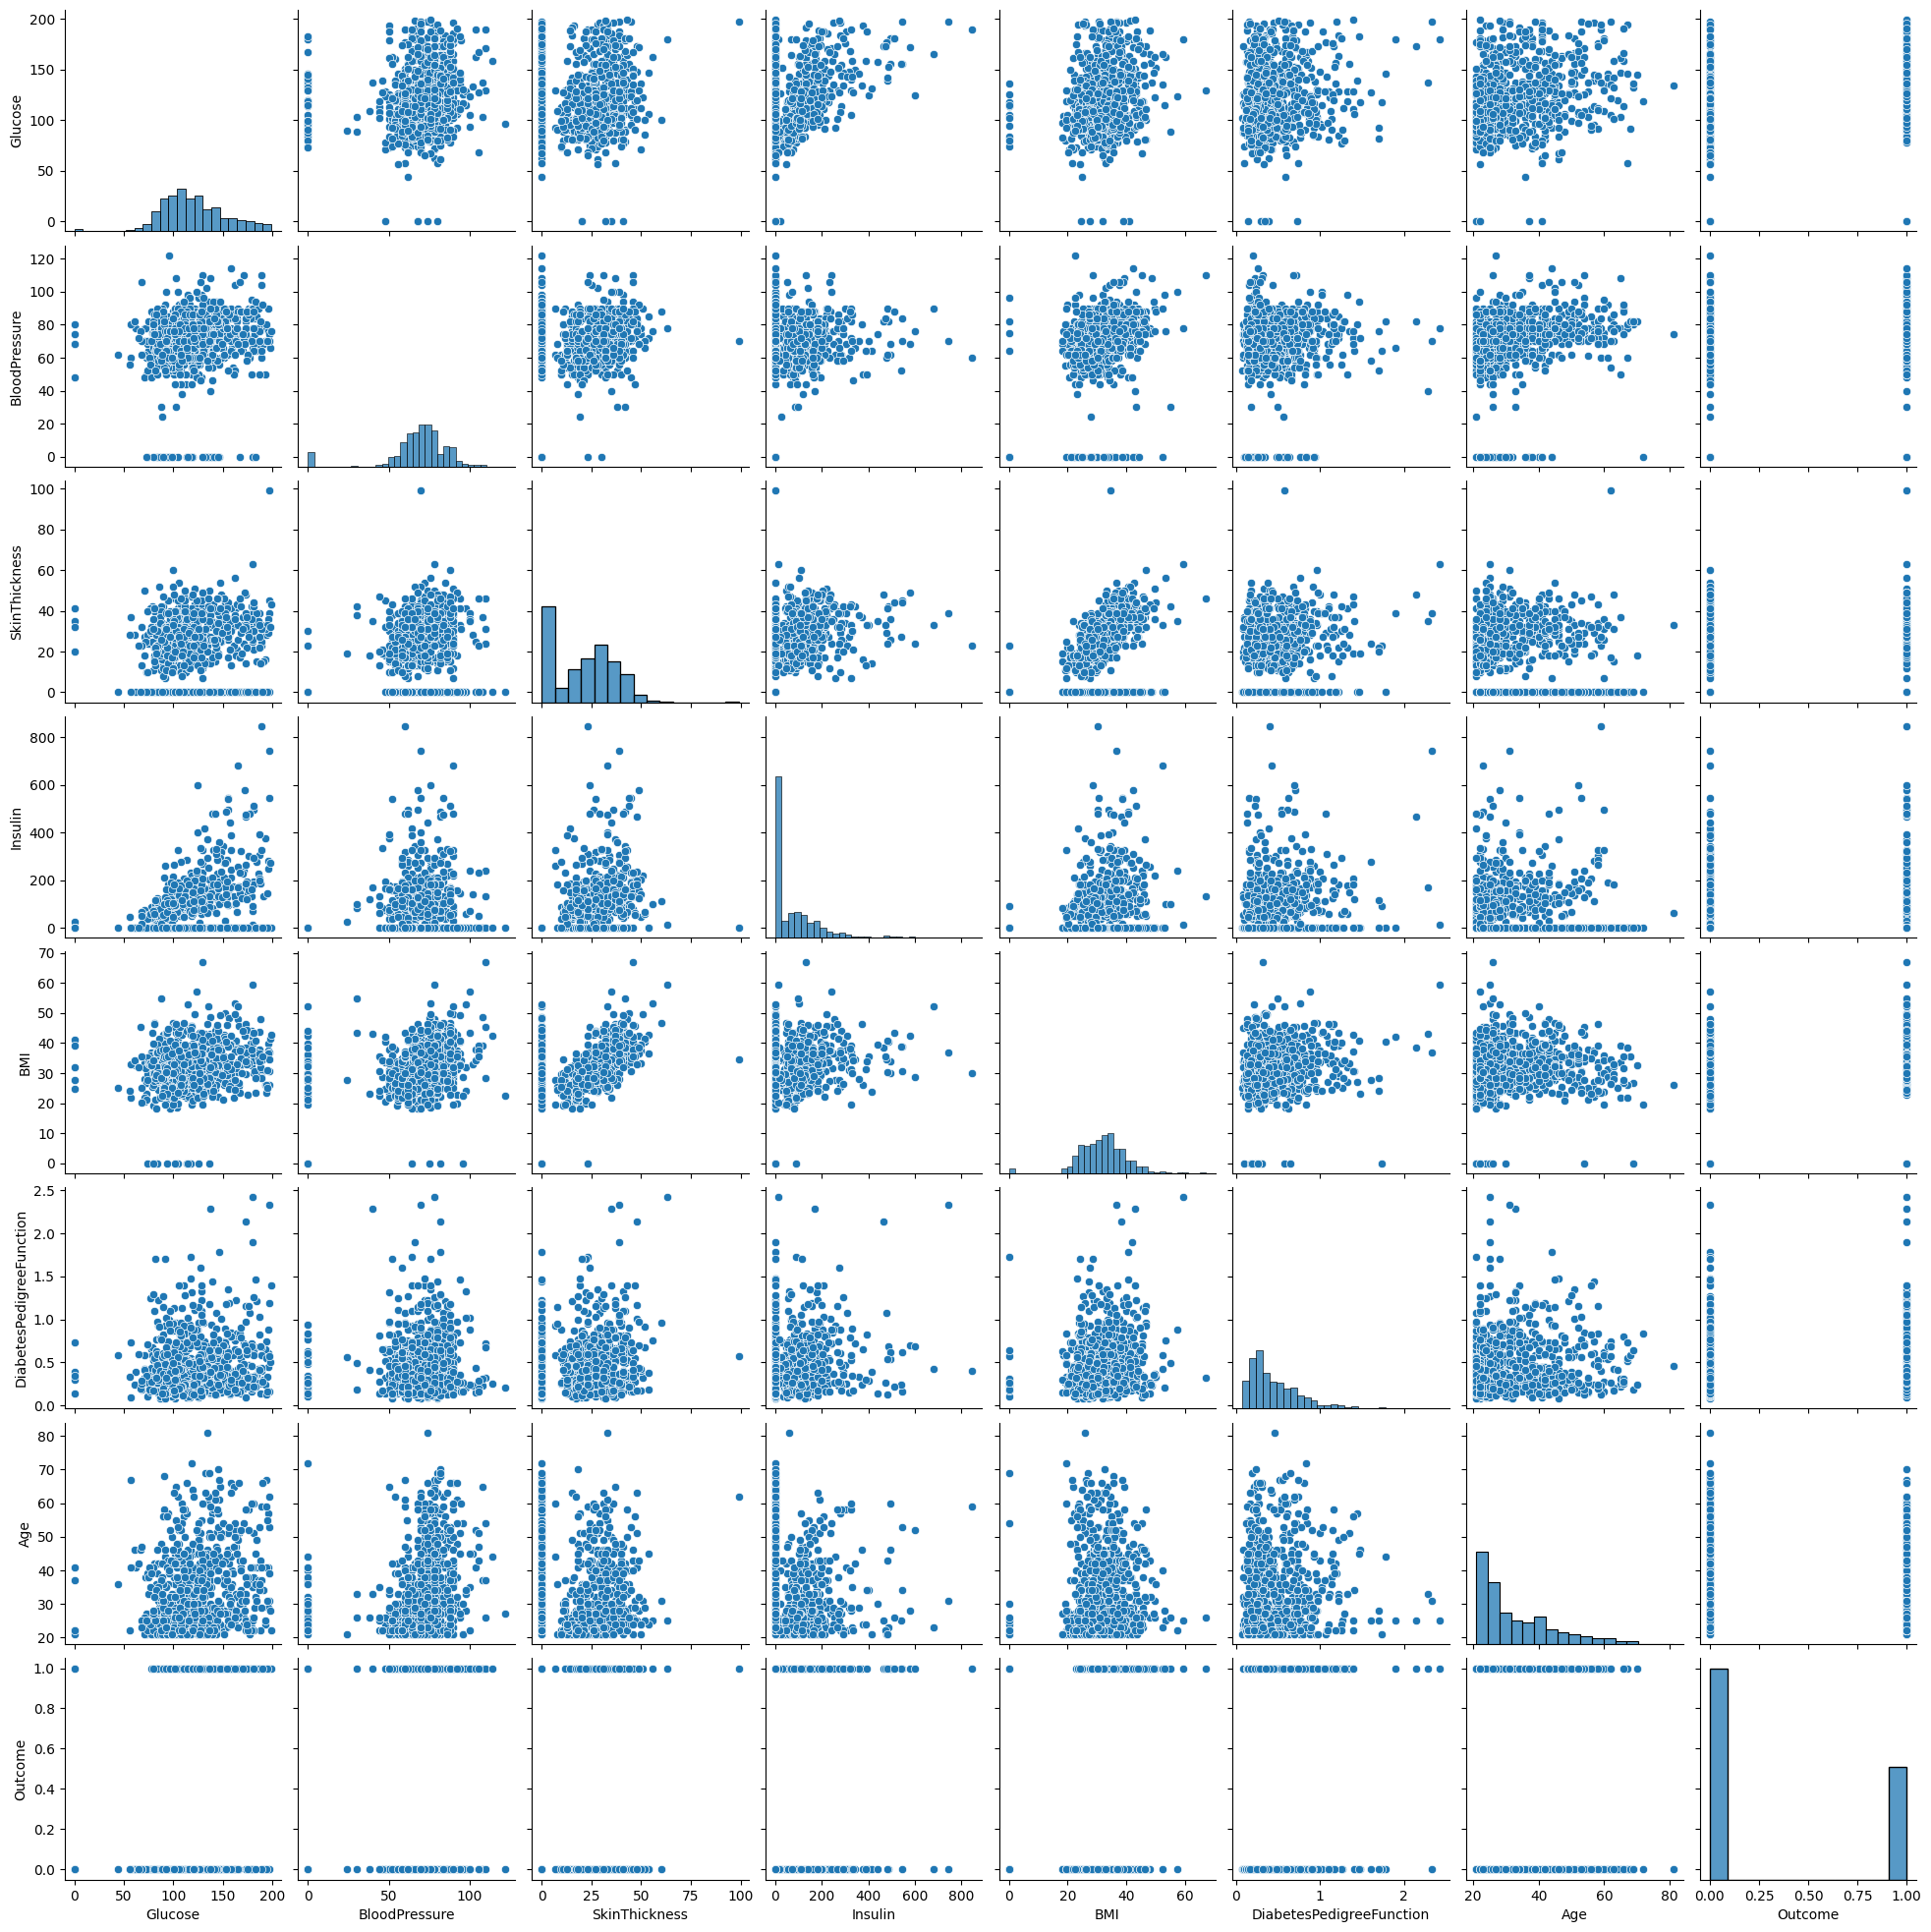

In [9]:
sns.pairplot(df) # 
plt.show()

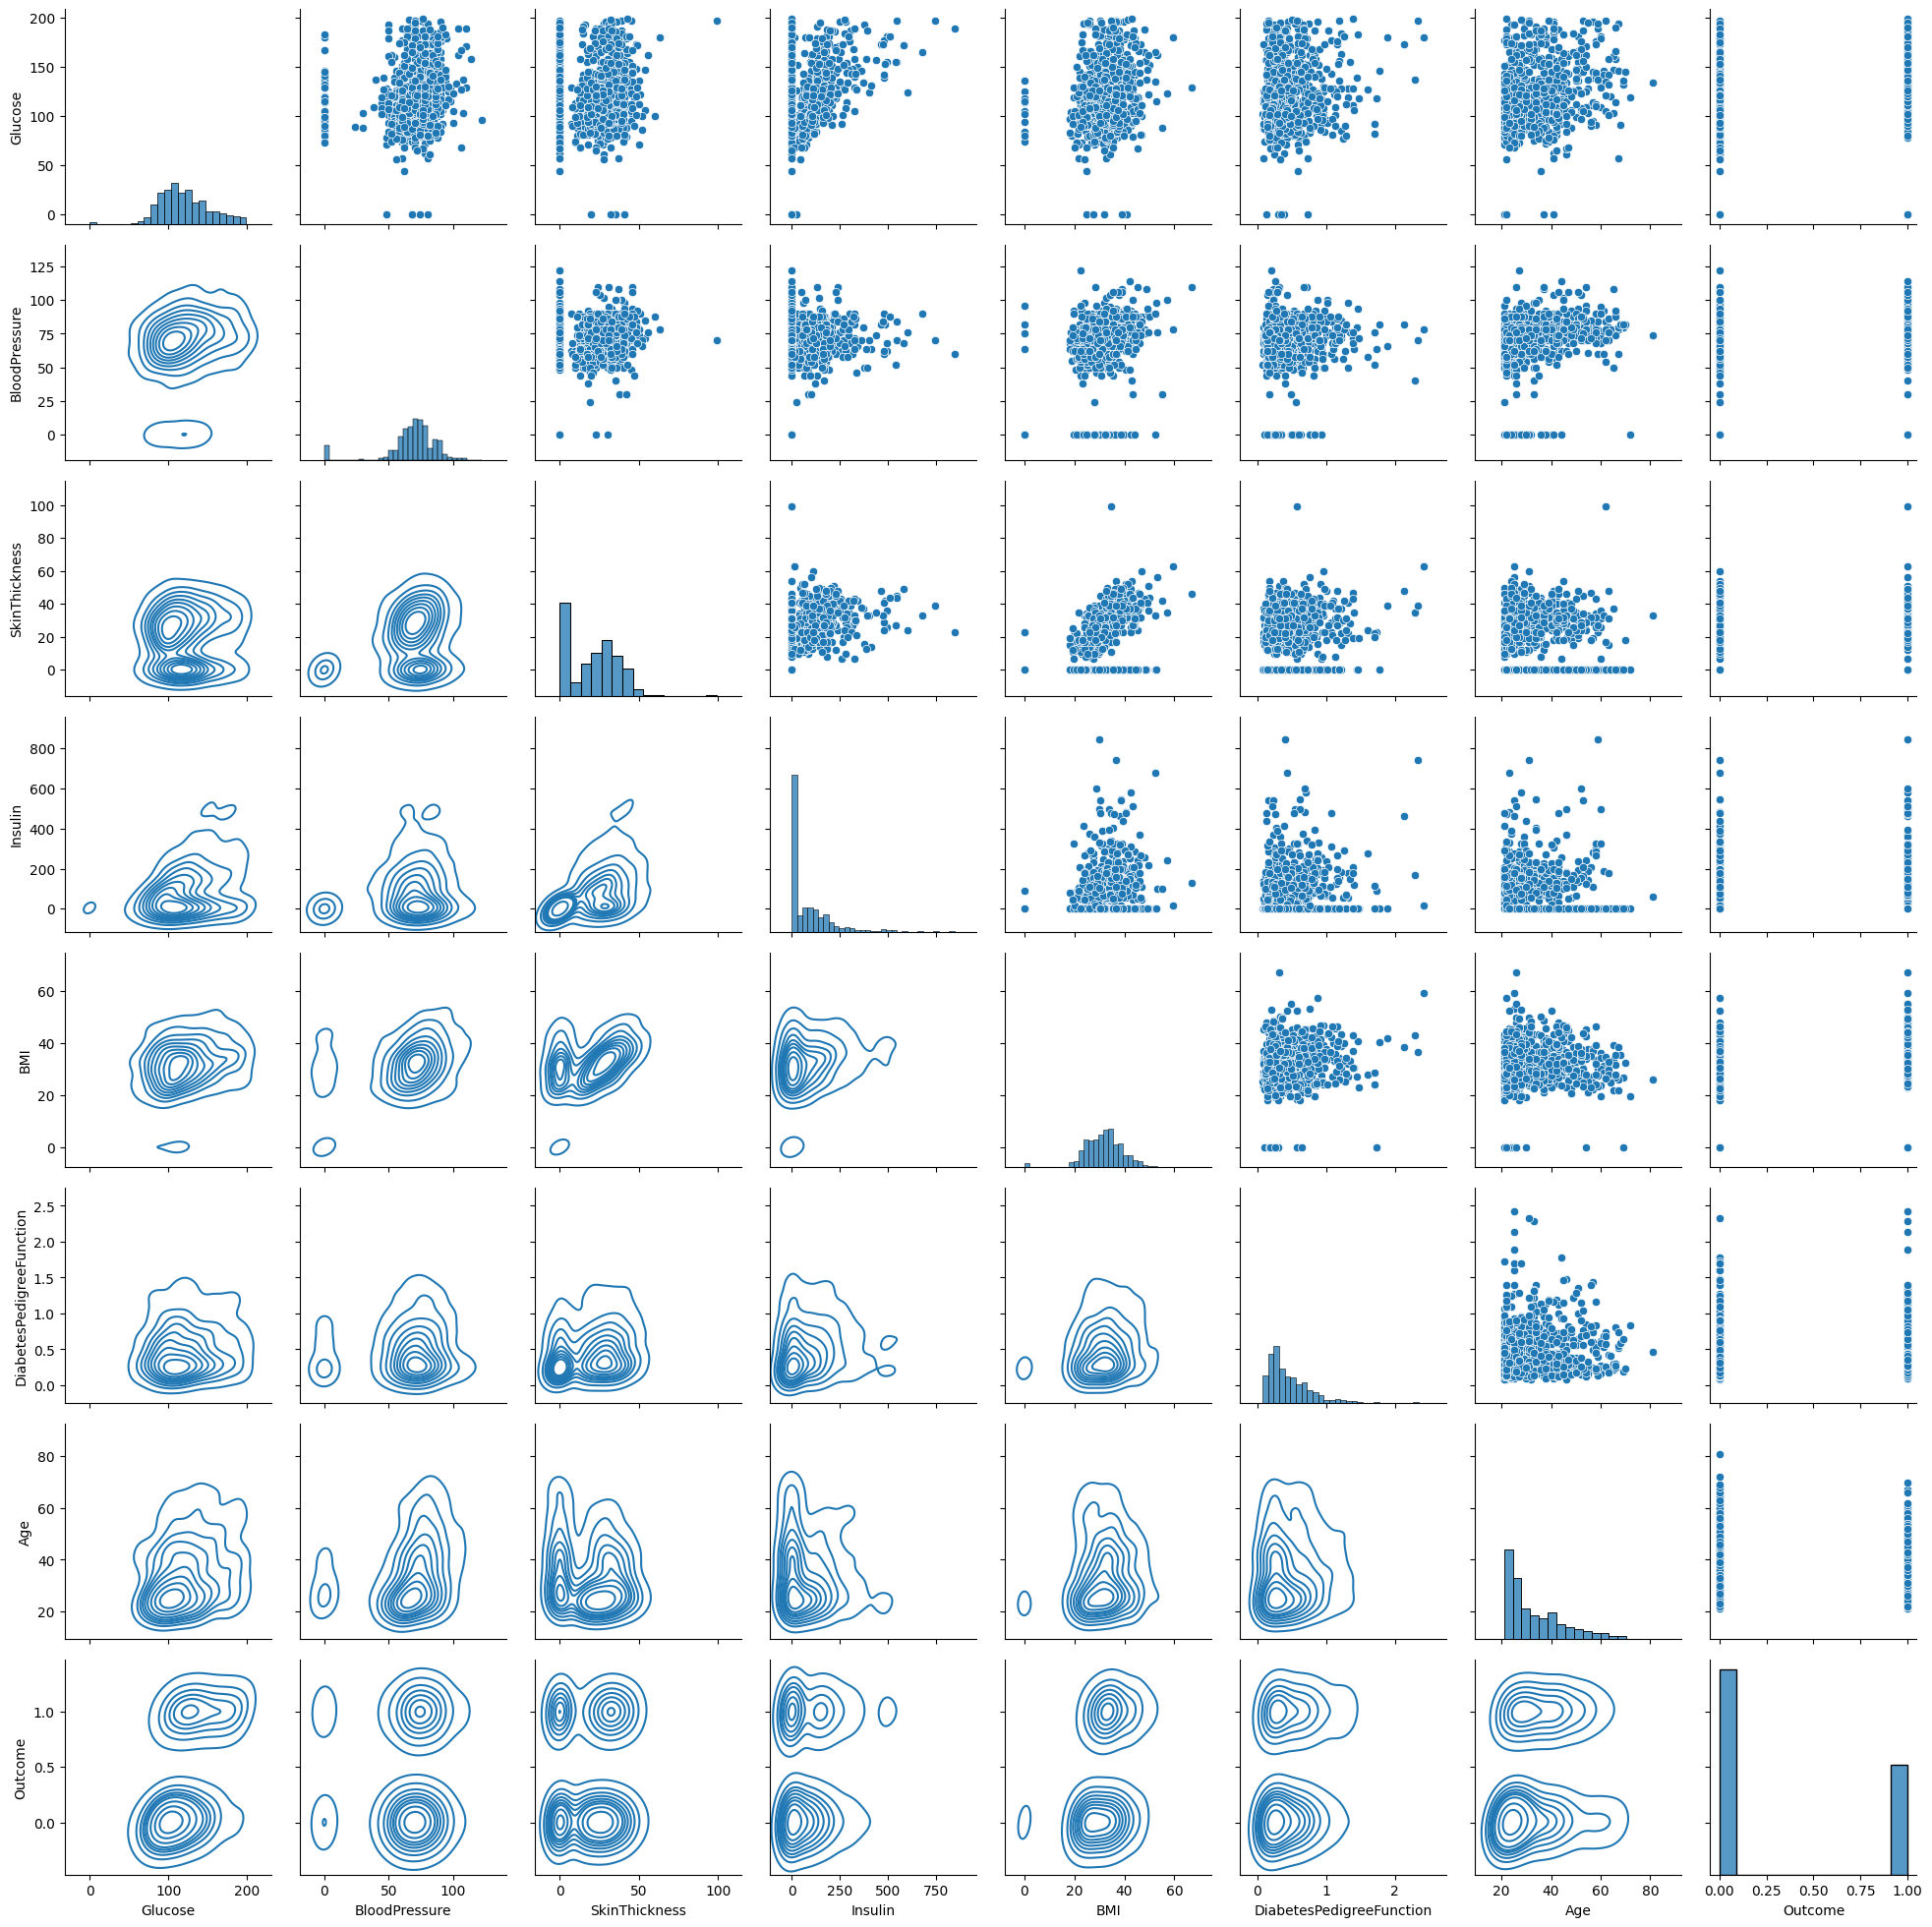

In [19]:
grid = sns.PairGrid(df)
grid.map_upper(sns.scatterplot)
grid.map_lower(sns.kdeplot)
grid.map_diag(sns.histplot)
plt.show()

## Checking if data contain null value or not 

In [20]:
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

So, There is no null values in our data set so we need not to do any further change in our data-set

## Data Normalization

In [21]:
ndf=(df - df.min())/(df.max() - df.min())


In [22]:
ndf.describe()

Glucose  BloodPressure  SkinThickness     Insulin         BMI  \
count  768.000000     768.000000     768.000000  768.000000  768.000000   
mean     0.607510       0.566438       0.207439    0.094326    0.476790   
std      0.160666       0.158654       0.161134    0.136222    0.117499   
min      0.000000       0.000000       0.000000    0.000000    0.000000   
25%      0.497487       0.508197       0.000000    0.000000    0.406855   
50%      0.587940       0.590164       0.232323    0.036052    0.476900   
75%      0.704774       0.655738       0.323232    0.150414    0.545455   
max      1.000000       1.000000       1.000000    1.000000    1.000000   

       DiabetesPedigreeFunction         Age     Outcome  
count                768.000000  768.000000  768.000000  
mean                   0.168179    0.204015    0.348958  
std                    0.141473    0.196004    0.476951  
min                    0.000000    0.000000    0.000000  
25%                    0.070773    0.050000    0.000000  
50%                    0.125747    0.133333    0.000000  
75%                    0.234095    0.333333    1.000000  
max                    1.000000    1.000000    1.000000

In [23]:
X_n = ndf.drop('Outcome',axis=1)
Y_n = ndf['Outcome']
print(X_n.head(5))
print(Y_n.head(2))


    Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0  0.743719       0.590164       0.353535  0.000000  0.500745   
1  0.427136       0.540984       0.292929  0.000000  0.396423   
2  0.919598       0.524590       0.000000  0.000000  0.347243   
3  0.447236       0.540984       0.232323  0.111111  0.418778   
4  0.688442       0.327869       0.353535  0.198582  0.642325   

   DiabetesPedigreeFunction       Age  
0                  0.234415  0.483333  
1                  0.116567  0.166667  
2                  0.253629  0.183333  
3                  0.038002  0.000000  
4                  0.943638  0.200000  
0    1.0
1    0.0
Name: Outcome, dtype: float64


## Splitting Training and Testing data

In [24]:
from sklearn.model_selection import train_test_split
X_Train,X_Test,Y_Train,Y_Test = train_test_split(X_n,Y_n,test_size =0.2, random_state=10)
print("\n",X_Train.shape,"\n",X_Test.shape,"\n",Y_Train.shape,"\n",Y_Test.shape)



 (614, 7) 
 (154, 7) 
 (614,) 
 (154,)


## Classification Using Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=10)
model.fit(X_Train, Y_Train)

LogisticRegression(random_state=10)

In [26]:
Y_Pred_Logistic = model.predict(X_Test)
Y_Prob_Logistic = model.predict_proba(X_Test)[:,1]
Y_Prob_Logistic



array([0.50970885, 0.27211714, 0.57187993, 0.15426028, 0.15811093,
       0.11228697, 0.16075537, 0.29790486, 0.13119025, 0.52679044,
       0.12170023, 0.27993476, 0.81349998, 0.33235077, 0.15226797,
       0.58619537, 0.69099852, 0.10294716, 0.15658754, 0.81912622,
       0.33098243, 0.40281923, 0.40765843, 0.23532812, 0.1431568 ,
       0.55465265, 0.28755395, 0.04003101, 0.48724735, 0.72031742,
       0.27626283, 0.07699638, 0.11816012, 0.16510535, 0.42018516,
       0.20516587, 0.28815011, 0.23449057, 0.63956023, 0.11303895,
       0.43250253, 0.25735264, 0.33620126, 0.38061319, 0.45740523,
       0.19258316, 0.45173397, 0.16818313, 0.3857061 , 0.2922477 ,
       0.14262173, 0.80418551, 0.35563817, 0.39820622, 0.38294899,
       0.14466676, 0.11004765, 0.38300209, 0.24935681, 0.11165871,
       0.19998628, 0.1879652 , 0.11400049, 0.42736156, 0.20377022,
       0.39559221, 0.52620529, 0.30301352, 0.19863305, 0.53031079,
       0.60586679, 0.26227329, 0.44292455, 0.42121955, 0.24611

## Predicted Class 


In [27]:
Y_Pred_Logistic

array([1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0.])

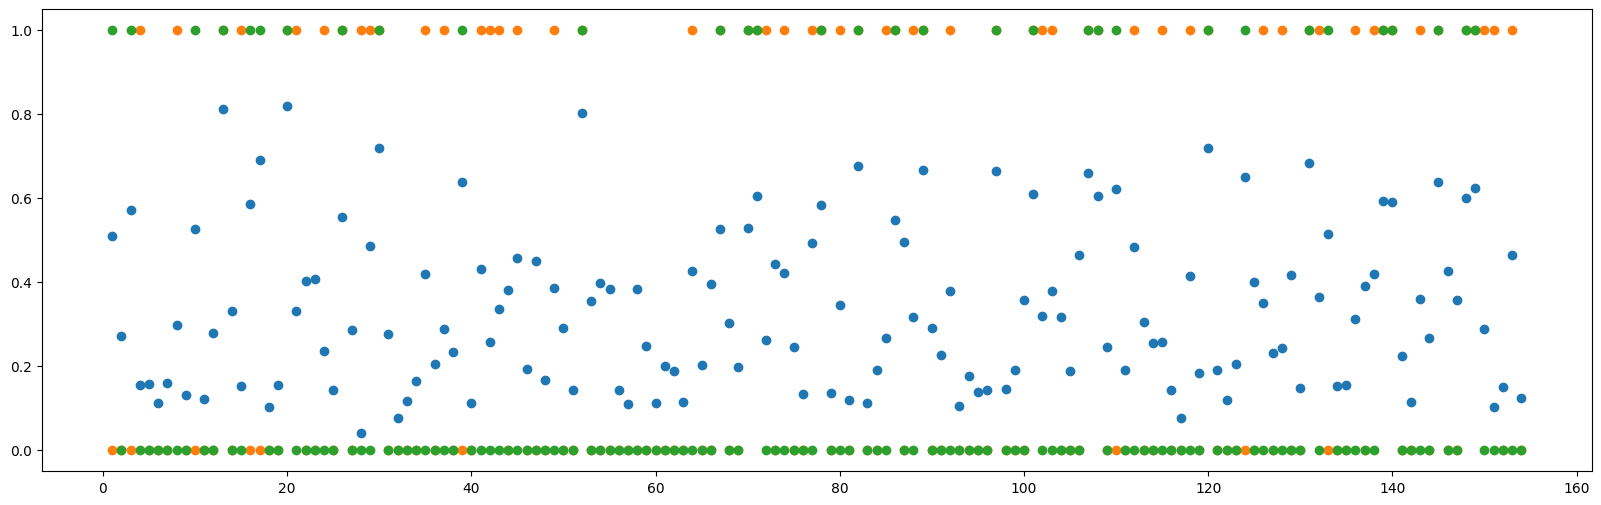

In [28]:
plt.figure(figsize=(20,6))
plt.scatter(np.linspace(1,154,154),Y_Prob_Logistic)
plt.scatter(np.linspace(1,154,154),Y_Test)
plt.scatter(np.linspace(1,154,154),Y_Pred_Logistic)
plt.show()



### Test of Binary Dependent Variable 

In [29]:
ndf.iloc[:,7].value_counts()

0.0    500
1.0    268
Name: Outcome, dtype: int64

## Test Multicolinaerity

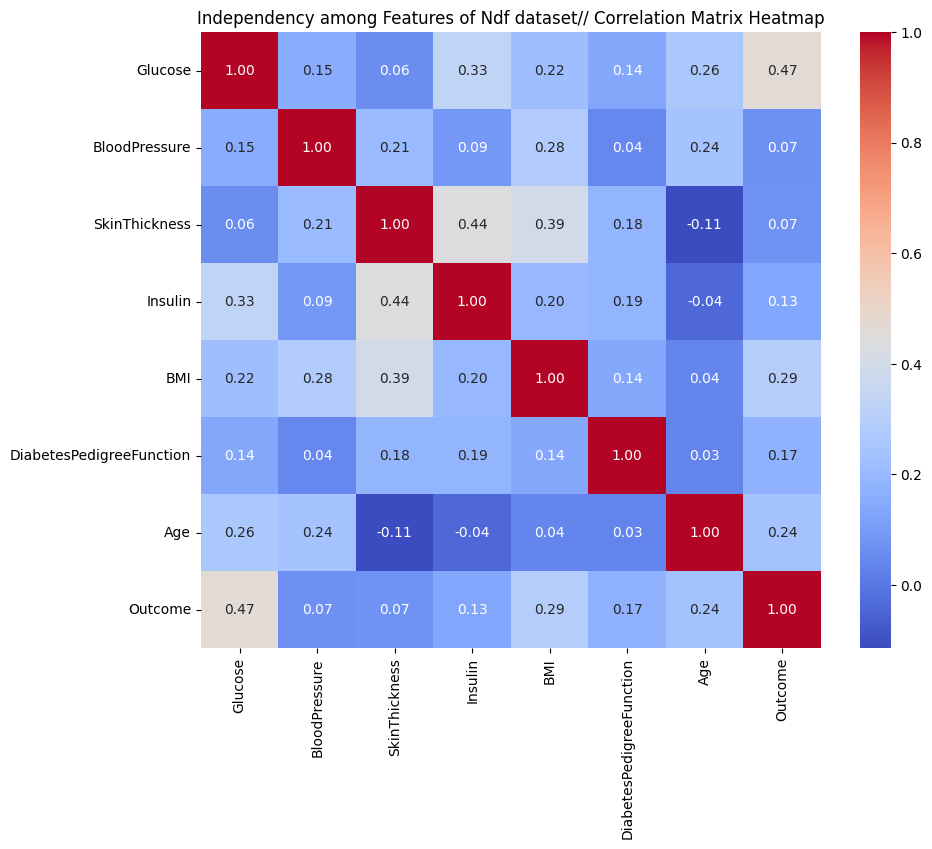

In [30]:
corr_matrix=ndf.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Independency among Features of Ndf dataset// Correlation Matrix Heatmap')
plt.show()

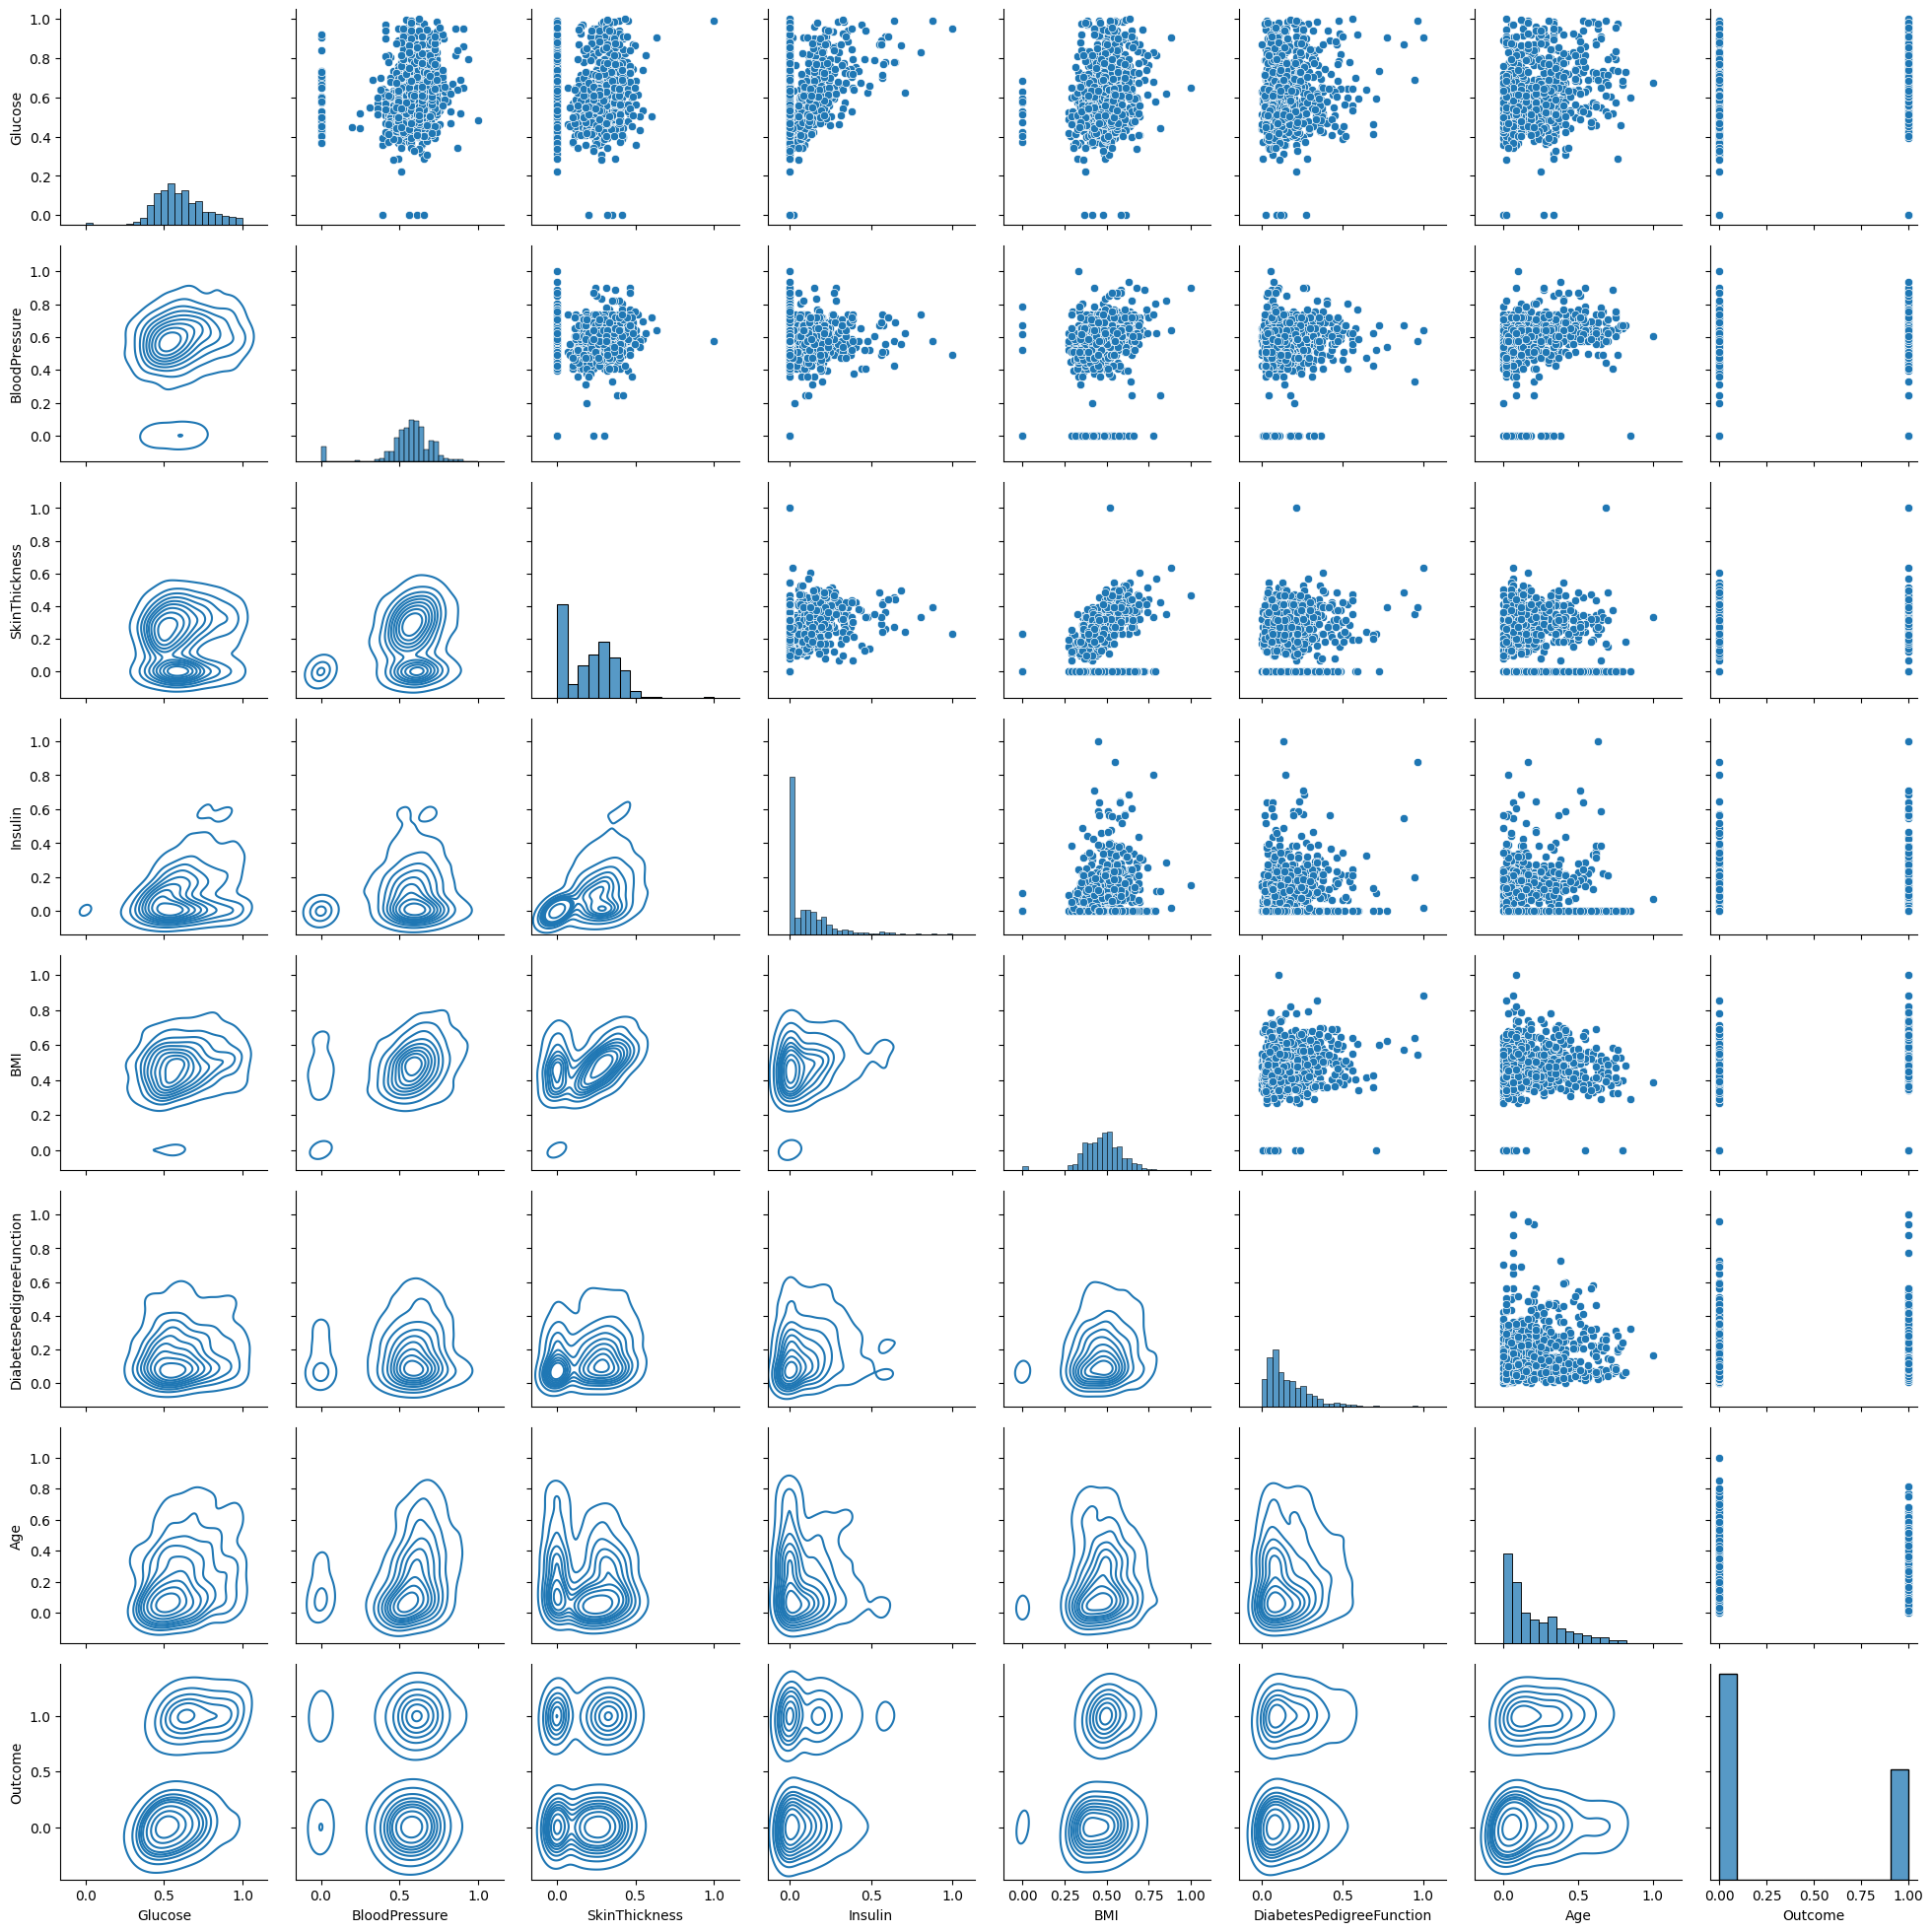

In [31]:
grid = sns.PairGrid(ndf)
grid.map_upper(sns.scatterplot)
grid.map_lower(sns.kdeplot)
grid.map_diag(sns.histplot)
plt.show()

## Classification Using K- Nearest Neighbour with Hyper  Parameter Tuning using Random Search CV

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
knn = KNeighborsClassifier()
param_dist_knn = {"weights": ['uniform','distance'],"n_neighbors":randint(1,10), "p":[2,1] }
clf_knn = RandomizedSearchCV(knn,param_dist_knn,)
clf_knn.fit(X_Train,Y_Train)
print("Tuned Parameters: {}".format(clf_knn.best_params_))
print("Best score is {}".format(clf_knn.best_score_))


Tuned Parameters: {'n_neighbors': 8, 'p': 2, 'weights': 'uniform'}
Best score is 0.7605757696921231


In [35]:
Y_Pred_Knn=clf_knn.predict(X_Test)
Y_Pred_Knn


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0.])

In [36]:
probability_knn=pd.DataFrame(clf_knn.predict_proba(X_Test))
probability_knn.head(5)

0      1
0  0.500  0.500
1  1.000  0.000
2  0.625  0.375
3  1.000  0.000
4  0.750  0.250

## Classification Using Decison Tree with Hyper Parameter Tuning using Random Search CV

In [37]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV


In [41]:

d_tree = DecisionTreeClassifier()

# Define parameter distributions for RandomizedSearchCV
param_dist_tree = {
    'criterion': ['gini', 'entropy'],  # You had a typo "entopy" corrected to "entropy"
    'class_weight': [{0: a_i, 1: b_i} for a_i in np.linspace(1, 1000, 10) for b_i in np.linspace(1, 1000, 10)]
}

# Perform RandomizedSearchCV
clf_d_tree = RandomizedSearchCV(d_tree, param_dist_tree, n_iter=10, random_state=42)
clf_d_tree.fit(X_Train, Y_Train)

# Print the best parameters and best score
print('Tuned parameters:', clf_d_tree.best_params_)
print('Best score:', clf_d_tree.best_score_)


Tuned parameters: {'criterion': 'gini', 'class_weight': {0: 778.0, 1: 1000.0}}
Best score: 0.7279754764760763


In [42]:
Y_Pred_Knn=clf_knn.predict(X_Test)
Y_Pred_Knn

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0.])

In [43]:
Y_Pre_d_Tree = clf_d_tree.predict(X_Test)
Y_Pre_d_Tree

array([1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       0.])

In [44]:
decision_tree = DecisionTreeClassifier(criterion= 'gini', 
class_weight= {0: 100, 1: 200},).fit(X_Train,Y_Train)
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(150,100))
plot_tree(decision_tree)
plt.show()

# Classification Using Naïve Bayes

In [45]:
from sklearn.naive_bayes import BernoulliNB
clf_Naive_Bayes =BernoulliNB().fit(X_Train,Y_Train)
Y_Pre_Naive_Bayes = clf_Naive_Bayes.predict(X_Test)
Y_Pre_Naive_Bayes


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

# Classification Using Support Vector Machine with Hype_Parameter Optimization

In [46]:
from sklearn.svm import SVC

In [47]:
param_svm = {
    'C' : np.linspace(0.001,10,10000)
}
clf_svm = RandomizedSearchCV(SVC(),param_svm)
clf_svm.fit(X_Train,Y_Train)
print('tuned parameter:',(clf_svm.best_params_),'\n','best score:',(clf_svm.best_score_))

tuned parameter: {'C': 7.8020000000000005} 
 best score: 0.7736238837798214


In [48]:
Y_Pred_SVM = clf_svm.predict(X_Test)
Y_Pred_SVM

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0.])

## Prediction using deferrent Classification Techniques 

In [49]:
Y_Predicted = pd.DataFrame(
 { 'Y_True' : Y_Test,
 'Logistic Regression' : Y_Pred_Logistic,
 'K-NN' : Y_Pred_Knn,
 'Naive Bayes' : Y_Pre_Naive_Bayes,
 'ecision_Tree' : Y_Pre_d_Tree,
 'SVM' : Y_Pred_SVM
}
)
Y_Predicted.head().reset_index(drop = True)


Y_True  Logistic Regression  K-NN  Naive Bayes  ecision_Tree  SVM
0     0.0                  1.0   0.0          0.0           1.0  1.0
1     0.0                  0.0   0.0          0.0           1.0  0.0
2     0.0                  1.0   0.0          0.0           0.0  0.0
3     1.0                  0.0   0.0          0.0           0.0  0.0
4     0.0                  0.0   0.0          0.0           1.0  0.0

## Analysis of Accuracy,Confusion Matrix and AUC for each Classifification Techniques


In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,ConfusionMatrixDisplay


In [51]:
Accuracy =pd.DataFrame([['Logistic_Regression',accuracy_score(Y_Test,Y_Pred_Logistic)],['Naive Bayes',accuracy_score(Y_Test,Y_Pre_Naive_Bayes)],['KNN',accuracy_score(Y_Test,Y_Pred_Knn)],['Decesion Tree',accuracy_score(Y_Test,Y_Pre_d_Tree)],
['SVM',accuracy_score(Y_Test,Y_Pred_SVM)]])
Accuracy.rename(columns= {0:'Claasification Techniques',1:'Accuracy'})


Claasification Techniques  Accuracy
0       Logistic_Regression  0.707792
1               Naive Bayes  0.616883
2                       KNN  0.681818
3             Decesion Tree  0.668831
4                       SVM  0.740260

# Confusion Matrix


In [52]:
Confusion_Matrix = pd.DataFrame([
    ['Logistic_Regression',confusion_matrix(Y_Test,Y_Pred_Logistic).ravel()],
    ['Naive Bayes',confusion_matrix(Y_Test,Y_Pre_Naive_Bayes).ravel()],
    ['K-NN',confusion_matrix(Y_Test,Y_Pred_Knn).ravel()],
    ['Decesion Tree',confusion_matrix(Y_Test,Y_Pre_d_Tree).ravel()],
    ['SVM',confusion_matrix(Y_Test,Y_Pred_SVM).ravel()]])
(Confusion_Matrix.rename(columns={0: 'Classification Techniques', 1: 'TN, FP, FN, TP'}))

Classification Techniques    TN, FP, FN, TP
0       Logistic_Regression   [86, 9, 36, 23]
1               Naive Bayes    [95, 0, 59, 0]
2                      K-NN  [83, 12, 37, 22]
3             Decesion Tree  [71, 24, 27, 32]
4                       SVM   [86, 9, 31, 28]

### For Logistic Regression 

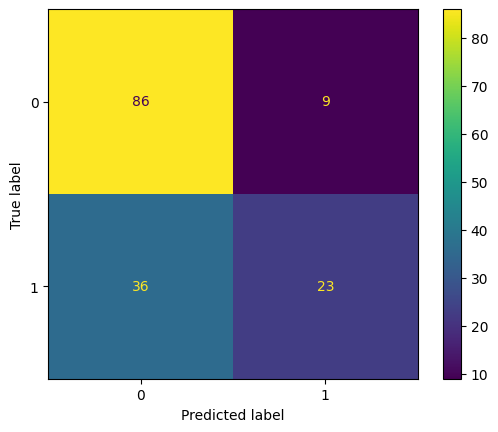

In [53]:
ConfusionMatrixDisplay(confusion_matrix(Y_Test,Y_Pred_Logistic)).plot()

### for K-NN

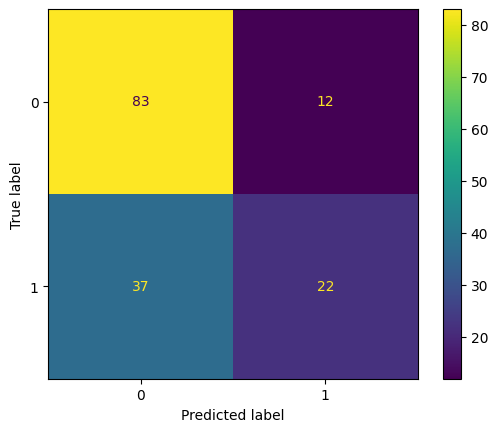

In [54]:
ConfusionMatrixDisplay(confusion_matrix(Y_Test,Y_Pred_Knn)).plot()

### For SVM

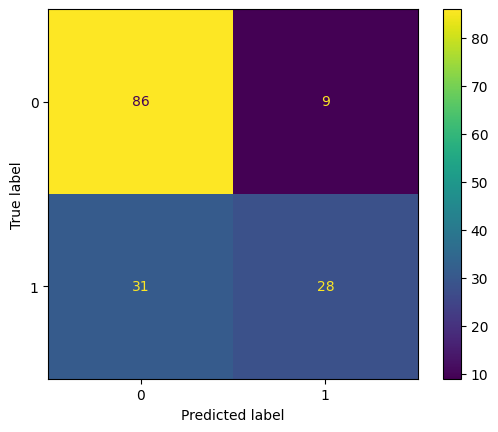

In [55]:
ConfusionMatrixDisplay(confusion_matrix(Y_Test,Y_Pred_SVM)).plot()

## For Naive Byes

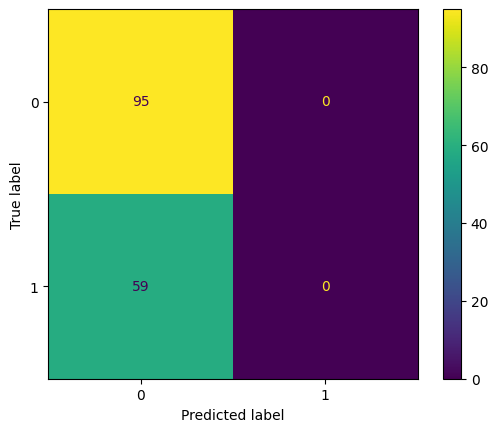

In [56]:
ConfusionMatrixDisplay(confusion_matrix(Y_Test,Y_Pre_Naive_Bayes)).plot()


### For Decision Tree

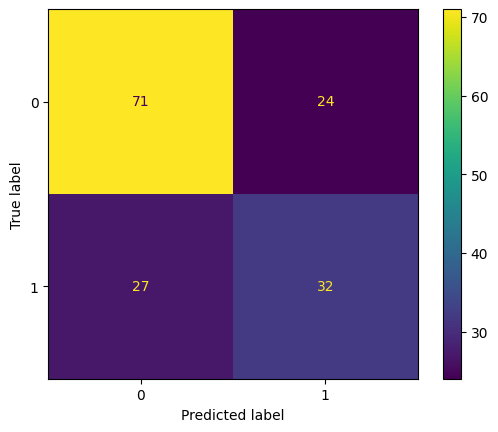

In [57]:
ConfusionMatrixDisplay(confusion_matrix(Y_Test,Y_Pre_d_Tree)).plot()


# ROC CURVE

In [58]:
from sklearn.metrics import roc_curve, auc
fpr_logistic, tpr_logistic, _ = roc_curve(Y_Test,Y_Pred_Logistic)
fpr_knn, tpr_knn, _ = roc_curve(Y_Test,Y_Pred_Knn)
fpr_naivebayes, tpr_naivebayes, _ = roc_curve(Y_Test,Y_Pre_Naive_Bayes)
fpr_decisiontree, tpr_decisiontree, _ = roc_curve(Y_Test,Y_Pre_d_Tree)
fpr_svm, tpr_svm, _ = roc_curve(Y_Test,Y_Pred_SVM) 

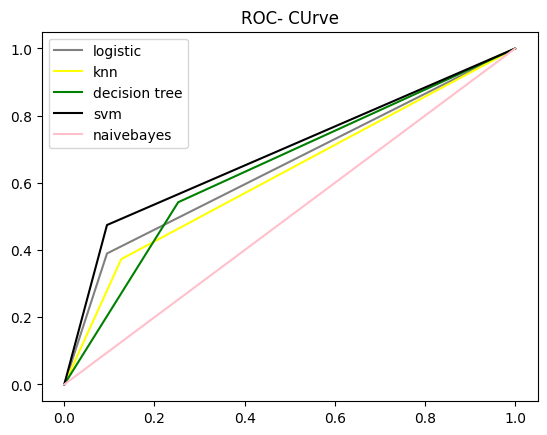

In [59]:
plt.plot(fpr_logistic,tpr_logistic, label ='logistic',color = 'grey')  
plt.plot(fpr_knn, tpr_knn,label = 'knn',color = 'yellow')
plt.plot(fpr_decisiontree, tpr_decisiontree ,label = 'decision tree', color = 'green') 
plt.plot(fpr_svm, tpr_svm, label = 'svm', color ='black') 
plt.plot(fpr_naivebayes, tpr_naivebayes, label = 'naivebayes', color ='pink') 
plt.legend()
plt.title('ROC- CUrve')
plt.show()

## Area Under Curve Score

In [60]:
auc_matrix = pd.DataFrame([
    ['Logistic_Regression',auc(fpr_logistic,tpr_logistic)],
    ['Naive Bayes',auc(fpr_naivebayes,tpr_naivebayes)],
    ['K-NN',auc(fpr_knn,tpr_knn)],
    ['Decesion Tree',auc(fpr_decisiontree,tpr_decisiontree)],
    ['SVM',auc(fpr_svm,tpr_svm)]])
(auc_matrix.rename(columns={0: 'Classification Techniques', 1: 'auc_score'}))

Classification Techniques  auc_score
0       Logistic_Regression   0.647547
1               Naive Bayes   0.500000
2                      K-NN   0.623283
3             Decesion Tree   0.644871
4                       SVM   0.689920

### Interpretation

#### The table provided shows the performance of different classification techniques based on their AUC scores . The AUC score is a metric used to evaluate the performance of classification models. It measures how well the model can distinguish between positive and negative classes, ranging from 0 to 1

> Logistic Regression: It has an AUC score of 0.682337. This suggests that the model has moderate performance in distinguishing between the positive and negative classes.

> Naive Bayes: It has an AUC score of 0.500000. An AUC score of 0.5 indicates that the model is performing no better than random chance in distinguishing between the positive and negative classes.

> K-NN (K-Nearest Neighbors): It has an AUC score of 0.679393. Like Logistic Regression, the K-NN model shows moderate performance, closely similar to that of Logistic Regression.

> Decision Tree: It has an AUC score of 0.709188. This score suggests that the Decision Tree model performs slightly better than the previous models in distinguishing between the positive and negative classes.

> SVM (Support Vector Machine): It has an AUC score of 0.719447. This is the highest AUC score in the table, indicating that the SVM model is the most effective of the models listed in distinguishing between the positive and negative classes.

## Overall Interpretation:
The classification techniques in the table exhibit varying degrees of effectiveness in distinguishing between the positive and negative classes.

SVM performs the best among the models with an AUC score of 0.719447, suggesting that it is a strong model for this particular classification problem.

Naive Bayes performs the worst with an AUC score of 0.5, indicating that it does not perform any better than random chance.

Decision Tree, Logistic Regression, and K-NN have moderate performance.
